Bước 1: Tiền xử lí dữ liệu

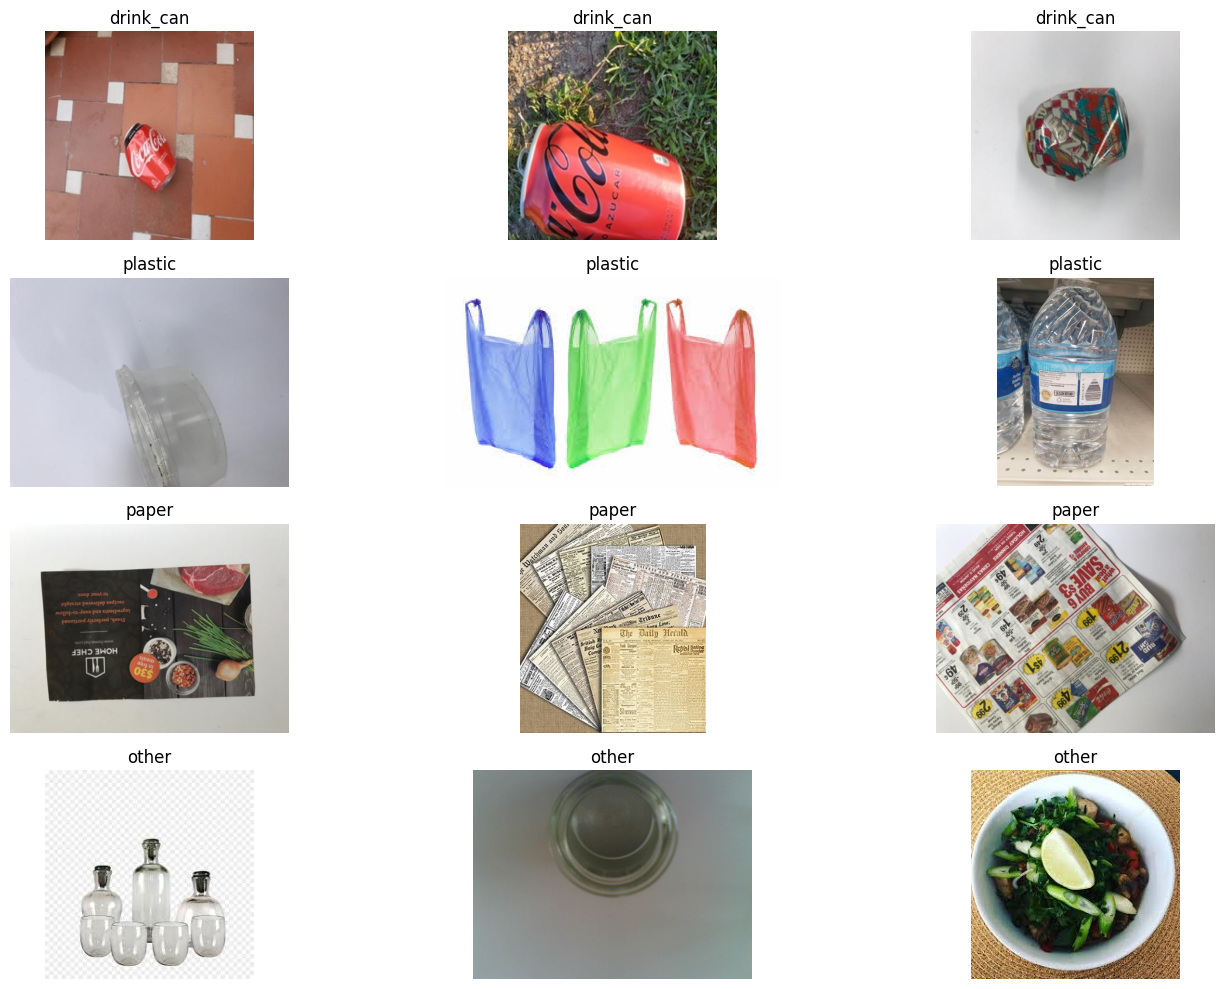

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the dataset
dataset_path = "/kaggle/input/data-4lop-v5-p3/data_4lop_v5_p3"

# Define the categories
categories = ["drink_can", "plastic", "paper", "other"]

# Define the number of images to display from each category
num_images_to_display = 3

# Set up the plot
fig, axes = plt.subplots(len(categories), num_images_to_display, figsize=(15, 10))

# Loop through each category
for i, category in enumerate(categories):
    if category == "other":
        # For 'other', we'll need to loop through its subfolders (battery, biological, cardboard, trash)
        other_path = os.path.join(dataset_path, category)
        subfolders = os.listdir(other_path)  # List all subfolders in 'other'

        for j in range(num_images_to_display):
            # Randomly pick a subfolder under 'other'
            subfolder = random.choice(subfolders)
            subfolder_path = os.path.join(other_path, subfolder)
            image_files = os.listdir(subfolder_path)
            random.shuffle(image_files)  # Shuffle the list of image files

            # Select a random image from the subfolder
            img_file = image_files[0]  # Pick the first image after shuffling
            img_path = os.path.join(subfolder_path, img_file)
            img = mpimg.imread(img_path)

            # Display the image
            axes[i, j].imshow(img)
            axes[i, j].set_title("other")
            axes[i, j].axis('off')

    else:
        # For other categories like 'metal', 'plastic', 'paper'
        category_path = os.path.join(dataset_path, category)
        image_files = os.listdir(category_path)
        random.shuffle(image_files)  # Shuffle the list of image files

        # Display randomly selected images
        for j in range(num_images_to_display):
            img_file = image_files[j]
            img_path = os.path.join(category_path, img_file)
            img = mpimg.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(category)
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Bước 2: Phân chia dữ liệu cho train, valid, test

In [2]:
from sklearn.model_selection import train_test_split
import os
import shutil
import random

# Đường dẫn đến dữ liệu gốc
dataset_path = "/kaggle/input/data-4lop-v5-p3/data_4lop_v5_p3"

# Các danh mục (categories)
categories = ["drink_can", "plastic", "paper", "other"]

# Tỉ lệ dữ liệu dành cho từng tập
train_size = 0.7
valid_size = 0.15  # Validation chiếm 15%
test_size = 0.15   # Test chiếm 15%

# Thư mục chứa tập train, validation và test
train_dir = "/kaggle/working/train_dataset"
valid_dir = "/kaggle/working/valid_dataset"
test_dir = "/kaggle/working/test_dataset"

# Tạo thư mục train, validation và test nếu chưa tồn tại
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Vòng lặp qua từng danh mục
for category in categories:
    if category == "other":
        # Đối với "other", xử lý từng thư mục con như một danh mục riêng
        other_path = os.path.join(dataset_path, category)  # Đường dẫn tới thư mục "other"
        subfolders = os.listdir(other_path)  # Lấy danh sách các thư mục con trong "other"

        # Lặp qua các thư mục con và xử lý dữ liệu
        for subfolder in subfolders:
            subfolder_path = os.path.join(other_path, subfolder)  # Đường dẫn đến thư mục con
            image_files = os.listdir(subfolder_path)  # Danh sách các tệp trong thư mục con

            # Chia dữ liệu thành train và temp (gồm valid và test)
            train_images, temp_images = train_test_split(image_files, test_size=(1 - train_size), random_state=42)

            # Chia tiếp temp thành validation và test
            valid_images, test_images = train_test_split(temp_images, test_size=test_size / (valid_size + test_size), random_state=42)

            # Tạo thư mục con cho từng loại trong train, validation và test
            train_subfolder_dir = os.path.join(train_dir, category, subfolder)
            valid_subfolder_dir = os.path.join(valid_dir, category, subfolder)
            test_subfolder_dir = os.path.join(test_dir, category, subfolder)
            os.makedirs(train_subfolder_dir, exist_ok=True)
            os.makedirs(valid_subfolder_dir, exist_ok=True)
            os.makedirs(test_subfolder_dir, exist_ok=True)

            # Sao chép các hình ảnh vào thư mục train, validation và test cho từng thư mục con trong "other"
            for img_file in train_images:
                src_path = os.path.join(subfolder_path, img_file)  # Đường dẫn ảnh gốc
                dest_path = os.path.join(train_subfolder_dir, img_file)  # Đường dẫn đích
                shutil.copy(src_path, dest_path)

            for img_file in valid_images:
                src_path = os.path.join(subfolder_path, img_file)  # Đường dẫn ảnh gốc
                dest_path = os.path.join(valid_subfolder_dir, img_file)  # Đường dẫn đích
                shutil.copy(src_path, dest_path)

            for img_file in test_images:
                src_path = os.path.join(subfolder_path, img_file)  # Đường dẫn ảnh gốc
                dest_path = os.path.join(test_subfolder_dir, img_file)  # Đường dẫn đích
                shutil.copy(src_path, dest_path)

    else:
        # Đối với các danh mục khác như "metal", "plastic", "paper"
        category_path = os.path.join(dataset_path, category)  # Đường dẫn tới danh mục hiện tại
        image_files = os.listdir(category_path)  # Danh sách các tệp trong danh mục

        # Chia dữ liệu thành train và temp (gồm valid và test)
        train_images, temp_images = train_test_split(image_files, test_size=(1 - train_size), random_state=42)

        # Chia tiếp temp thành validation và test
        valid_images, test_images = train_test_split(temp_images, test_size=test_size / (valid_size + test_size), random_state=42)

        # Tạo thư mục con cho từng loại trong train, validation và test
        train_category_dir = os.path.join(train_dir, category)
        valid_category_dir = os.path.join(valid_dir, category)
        test_category_dir = os.path.join(test_dir, category)
        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(valid_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)

        # Sao chép các hình ảnh vào thư mục train
        for img_file in train_images:
            src_path = os.path.join(category_path, img_file)  # Đường dẫn ảnh gốc
            dest_path = os.path.join(train_category_dir, img_file)  # Đường dẫn đích
            shutil.copy(src_path, dest_path)

        # Sao chép các hình ảnh vào thư mục validation
        for img_file in valid_images:
            src_path = os.path.join(category_path, img_file)  # Đường dẫn ảnh gốc
            dest_path = os.path.join(valid_category_dir, img_file)  # Đường dẫn đích
            shutil.copy(src_path, dest_path)

        # Sao chép các hình ảnh vào thư mục test
        for img_file in test_images:
            src_path = os.path.join(category_path, img_file)  # Đường dẫn ảnh gốc
            dest_path = os.path.join(test_category_dir, img_file)  # Đường dẫn đích
            shutil.copy(src_path, dest_path)

print("Dataset has been split into training, validation, and test sets successfully!")

Dataset has been split into training, validation, and test sets successfully!


In [3]:
import os

# Hàm đếm số lượng ảnh trong từng lớp
def count_images_in_split(folder):
    print(f"Folder: {folder}")
    
    # Các lớp chính cần đếm: 'metal', 'plastic', 'paper', 'other'
    main_classes = ["drink_can", "plastic", "paper", "other"]
    
    # Duyệt qua các lớp chính
    for class_name in main_classes:
        class_path = os.path.join(folder, class_name)
        
        # Nếu lớp 'other' có thư mục con, chỉ cần đếm số lượng ảnh trong thư mục 'other' (không cần đi sâu vào các lớp con)
        if class_name == "other":
            # Đếm tất cả các ảnh trong thư mục 'other', không phân biệt thư mục con
            num_images = sum([len(files) for root, dirs, files in os.walk(class_path)])
        else:
            # Đếm ảnh trực tiếp trong thư mục lớp (metal, plastic, paper)
            num_images = len(os.listdir(class_path))
        
        print(f"Class: {class_name} - Number of Images: {num_images}")

# Kiểm tra số lượng ảnh trong từng tập (train, test, valid)
print("Training Set:")
count_images_in_split('train_dataset/')

print("\nTest Set:")
count_images_in_split('test_dataset/')

print("\nValid Set:")
count_images_in_split('valid_dataset/')

Training Set:
Folder: train_dataset/
Class: drink_can - Number of Images: 733
Class: plastic - Number of Images: 1381
Class: paper - Number of Images: 1425
Class: other - Number of Images: 2967

Test Set:
Folder: test_dataset/
Class: drink_can - Number of Images: 158
Class: plastic - Number of Images: 297
Class: paper - Number of Images: 306
Class: other - Number of Images: 639

Valid Set:
Folder: valid_dataset/
Class: drink_can - Number of Images: 157
Class: plastic - Number of Images: 296
Class: paper - Number of Images: 306
Class: other - Number of Images: 636


In [4]:
import os

# Hàm đếm số lượng ảnh trong từng lớp
def count_images_in_split(folder):
    print(f"Folder: {folder}")
    
    # Các lớp chính cần đếm: 'metal', 'plastic', 'paper', 'other'
    main_classes = ["drink_can", "plastic", "paper", "other"]
    
    # Duyệt qua các lớp chính
    for class_name in main_classes:
        class_path = os.path.join(folder, class_name)
        
        # Nếu lớp là 'other', ta cần đếm ảnh trong các thư mục con
        if class_name == "other":
            print(f"  Counting images in subcategories inside 'other'...")
            # Đếm tất cả các ảnh trong các thư mục con của 'other'
            total_images_in_other = 0
            for subfolder in os.listdir(class_path):
                subfolder_path = os.path.join(class_path, subfolder)
                if os.path.isdir(subfolder_path):  # Kiểm tra nếu là thư mục con
                    num_images_in_subfolder = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
                    print(f"    Subcategory '{subfolder}': {num_images_in_subfolder} images")
                    total_images_in_other += num_images_in_subfolder
            print(f"  Total images in 'other': {total_images_in_other} images")
        else:
            # Đếm ảnh trực tiếp trong các thư mục lớp (metal, plastic, paper)
            num_images = len(os.listdir(class_path))
            print(f"  Class '{class_name}': {num_images} images")
        
# Kiểm tra số lượng ảnh trong từng tập (train, test, valid)
print("Training Set:")
count_images_in_split('train_dataset/')

print("\nTest Set:")
count_images_in_split('test_dataset/')

print("\nValid Set:")
count_images_in_split('valid_dataset/')

Training Set:
Folder: train_dataset/
  Class 'drink_can': 733 images
  Class 'plastic': 1381 images
  Class 'paper': 1425 images
  Counting images in subcategories inside 'other'...
    Subcategory 'biological': 688 images
    Subcategory 'trash': 456 images
    Subcategory 'battery': 746 images
    Subcategory 'glass': 1077 images
  Total images in 'other': 2967 images

Test Set:
Folder: test_dataset/
  Class 'drink_can': 158 images
  Class 'plastic': 297 images
  Class 'paper': 306 images
  Counting images in subcategories inside 'other'...
    Subcategory 'biological': 148 images
    Subcategory 'trash': 98 images
    Subcategory 'battery': 161 images
    Subcategory 'glass': 232 images
  Total images in 'other': 639 images

Valid Set:
Folder: valid_dataset/
  Class 'drink_can': 157 images
  Class 'plastic': 296 images
  Class 'paper': 306 images
  Counting images in subcategories inside 'other'...
    Subcategory 'biological': 147 images
    Subcategory 'trash': 98 images
    Subca

Bước 3: Tăng cường dữ liệu cho tập train

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn đến các tập dữ liệu
train_dir = "/kaggle/working/train_dataset/"
test_dir = "/kaggle/working/test_dataset/"
valid_dir = "/kaggle/working/valid_dataset"

# Kích thước ảnh
img_height = 512
img_width = 384
batch_size = 32

# Data Augmentation cho tập huấn luyện
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa giá trị pixel
    rotation_range=20,  # Xoay ngẫu nhiên trong khoảng ±20°
    width_shift_range=0.2,  # Dịch chuyển chiều ngang
    height_shift_range=0.2,  # Dịch chuyển chiều dọc
    shear_range=0.2,  # Cắt nghiêng
    zoom_range=0.2,  # Phóng to/thu nhỏ
    horizontal_flip=True,  # Lật ngang
    fill_mode='nearest'  # Điền giá trị lân cận khi biến dạng
)

# Chỉ rescale cho tập validation và test
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator cho tập huấn luyện
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator cho tập validation
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator cho tập test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Không xáo trộn dữ liệu để giữ thứ tự nhãn
)

Found 6506 images belonging to 4 classes.
Found 1395 images belonging to 4 classes.
Found 1400 images belonging to 4 classes.


Bước 4: Tranning mô hình
1) Transfer learning: Sử dụng mô hình đã được huấn luyện trước (Inception V3) để trích xuất đặc trưng của ảnh tốt hơn
2) Đóng băng các lớp đã được tiền huấn luyện trên imagenet của mô hình Inception V3
3) Thêm các lớp Fully connected layer để đầu ra của mô hình phù hợp với bài toán
4) Thêm lớp Dropout để tránh overfitting
5) Thêm các kĩ thuật ReduceLROnPlateau để giảm learning rate khi mô hình không cải thiện

In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
# Load the InceptionV3 model pretrained on ImageNet without the top layer
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new top layers for classification
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add Dropout to prevent overfitting
predictions_inception = Dense(4, activation='softmax')(x)  # 4 output classes for your dataset

# Define the new model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Freeze the layers of the pretrained model
for layer in base_model_inception.layers:
    layer.trainable = False

# Compile the model
model_inception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Giảm LR đi một nửa
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model

history = model_inception.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[lr_scheduler]
)
# Save the model
model_inception.save("/kaggle/working/garbage_classification_model_inception_v5_p3.h5")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733504011.996228      90 service.cc:145] XLA service 0x792794003b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733504011.996294      90 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733504011.996300      90 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733504031.032976      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


204/204 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.6693 - loss: 0.9228 - val_accuracy: 0.8523 - val_loss: 0.3788 - learning_rate: 0.0010
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.8405 - loss: 0.4194 - val_accuracy: 0.9011 - val_loss: 0.2854 - learning_rate: 0.0010
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.8584 - loss: 0.3757 - val_accuracy: 0.8918 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.8707 - loss: 0.3560 - val_accuracy: 0.8946 - val_loss: 0.2797 - learning_rate: 0.0010
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.8678 - loss: 0.3350 - val_accuracy: 0.8817 - val_loss: 0.2837 - learning_rate: 0.0010
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.8860 - loss: 0.3216 - val_accuracy: 0.8817 - val_loss: 0.2953 - learning_rate: 0.0010
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.8902 - loss: 0.3028 - val_

Bước 6) Đánh giá mô hình

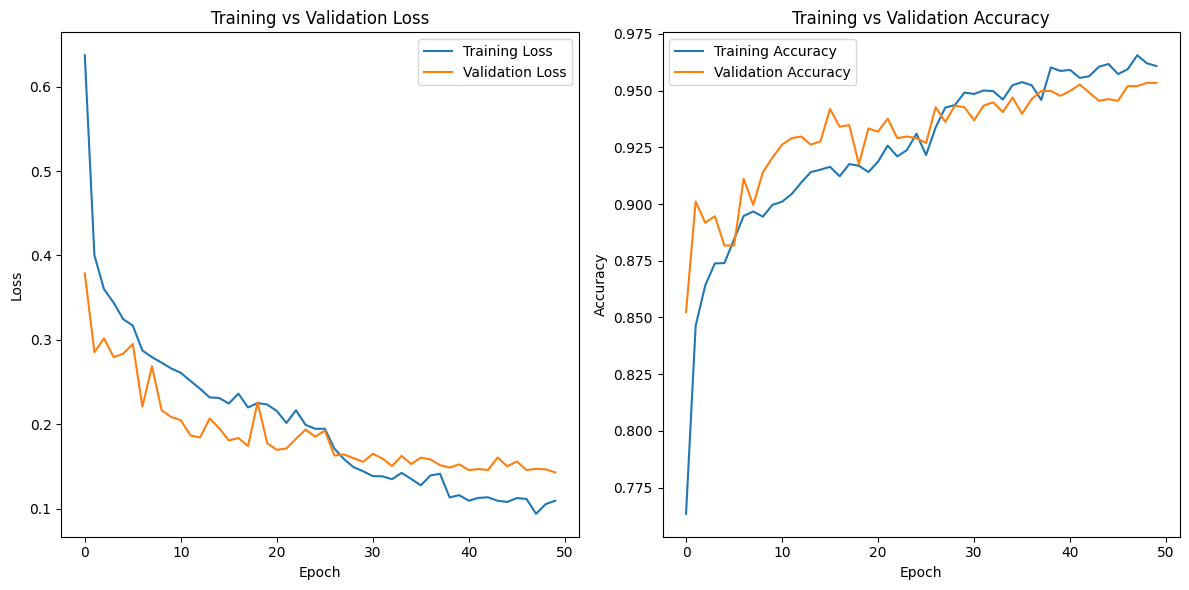

In [7]:
# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot training vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.models import load_model
model_inception = load_model("/kaggle/working/garbage_classification_model_inception_v5_p3.h5")

def predict_waste_category(image_path, model):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((384, 512))  # Resize the image to match the input shape of the model
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the category of waste
    prediction = model.predict(img_array)
    print("Prediction output:", prediction)
    print("Prediction shape:", prediction.shape)
    waste_categories = ['drink_can', 'other', 'paper', 'plastic']
    predicted_category_index = np.argmax(prediction)
    predicted_category = waste_categories[predicted_category_index]
    
    # Get the probability associated with the predicted category
    probability = prediction[0][predicted_category_index]
    return predicted_category, probability

# Example usage
image_path ="/kaggle/working/test_dataset/other/glass/50de5a4c-c0c2-4f44-91fa-9d81c315fa75.jpg"
predicted_category, probability = predict_waste_category(image_path, model_inception)
print("Predicted waste category:", predicted_category)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Prediction output: [[2.2051197e-03 9.9239153e-01 7.4931968e-04 4.6539609e-03]]
Prediction shape: (1, 4)
Predicted waste category: other


Found 1400 images belonging to 4 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 757ms/step - accuracy: 0.9498 - loss: 0.1274
Test loss: 0.12353379279375076
Test accuracy: 0.9514285922050476
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 425ms/step

Classification Report:
              precision    recall  f1-score   support

   drink_can       0.92      0.91      0.92       158
       other       0.96      0.96      0.96       639
       paper       0.98      0.96      0.97       306
     plastic       0.93      0.93      0.93       297

    accuracy                           0.95      1400
   macro avg       0.95      0.94      0.94      1400
weighted avg       0.95      0.95      0.95      1400



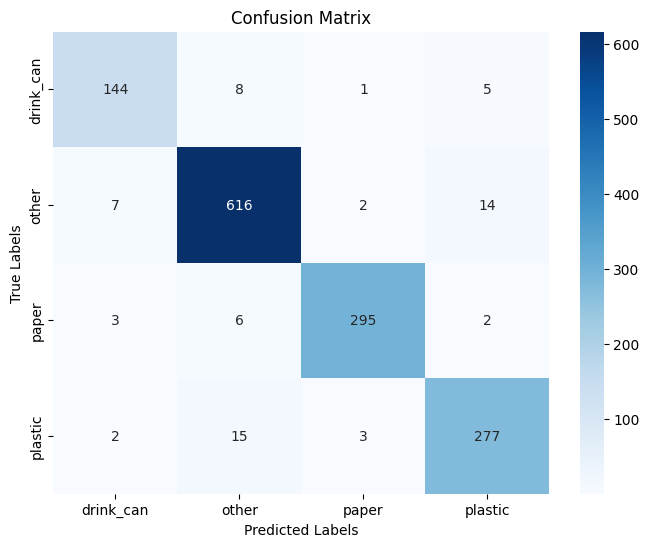

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Đảm bảo không trộn ảnh để giữ thứ tự
)

# Evaluate the model
test_loss, test_accuracy = model_inception.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Get predictions and true labels
test_generator.reset()
predictions = model_inception.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()